## Linear and Multiple Rregression

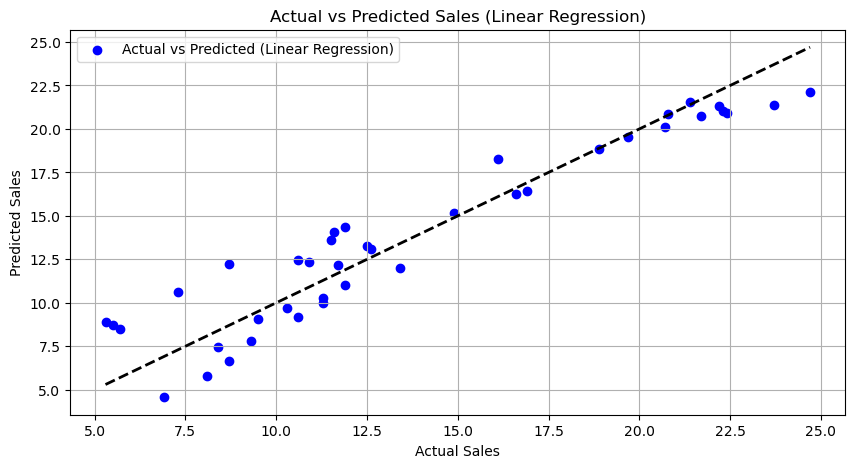

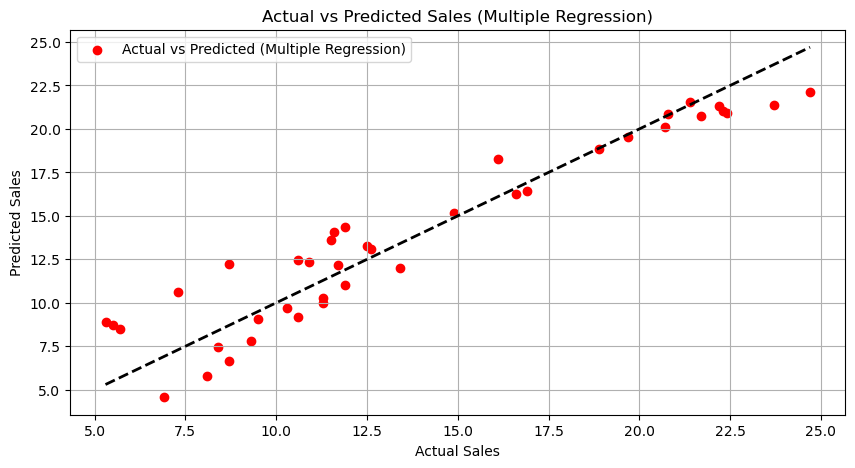

Target sales achieved with linear regression: 552.400847962204
Target sales achieved with multiple regression: 14.20667905038047


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the advertising data
advertising_data = pd.read_csv('Advertising.csv')

# Separate features (X) and target variable (y)
X = advertising_data[['TV', 'radio', 'newspaper']]
y = advertising_data['sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Predict sales using linear regression
y_pred_linear = linear_model.predict(X_test)

# Calculate the target sales achieved with 1000 USD budget
budget = 1000
target_sales = 300

# Calculate the total advertising spending
total_spending = budget + X_test.sum(axis=1)

# Calculate the predicted sales with multiple regression
y_pred_multiple = linear_model.predict(X_test)
target_sales_achieved_multiple = np.sum(total_spending * y_pred_multiple) / np.sum(total_spending)

# Visualizing actual vs predicted sales for linear regression
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_linear, color='blue', label='Actual vs Predicted (Linear Regression)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales (Linear Regression)')
plt.legend()
plt.grid(True)
plt.show()

# Visualizing actual vs predicted sales for multiple regression
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_multiple, color='red', label='Actual vs Predicted (Multiple Regression)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales (Multiple Regression)')
plt.legend()
plt.grid(True)
plt.show()

print("Target sales achieved with linear regression:", np.sum(y_pred_linear))
print("Target sales achieved with multiple regression:", target_sales_achieved_multiple)


 ## R^2, t-stat, and p-value

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

# Load the advertising data
advertising_data = pd.read_csv('Advertising.csv')

# Separate features (X) and target variable (y)
X = advertising_data[['TV', 'radio', 'newspaper']]
y = advertising_data['sales']

# Add constant term for multiple regression with statsmodels
X_with_const = sm.add_constant(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_with_const, y, test_size=0.2, random_state=42)

# Linear regression model with sklearn
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Predict sales using linear regression
y_pred_linear = linear_model.predict(X_test)

# Calculate R-squared for linear regression
r2_linear = r2_score(y_test, y_pred_linear)

# Get summary statistics for multiple regression with statsmodels
multiple_model = sm.OLS(y_train, X_train).fit()
summary = multiple_model.summary()

# Get t-statistics and p-values for multiple regression
t_stats = summary.tables[1].data[2][3:]
p_values = summary.tables[1].data[3][3:]

print("Linear Regression Results:")
print("R-squared:", r2_linear)

print("\nMultiple Regression Results:")
print(summary)
print("T-Statistics:", t_stats)
print("P-Values:", p_values)


Linear Regression Results:
R-squared: 0.8994380241009119

Multiple Regression Results:
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     446.6
Date:                Wed, 28 Feb 2024   Prob (F-statistic):           2.53e-76
Time:                        22:55:35   Log-Likelihood:                -306.64
No. Observations:                 160   AIC:                             621.3
Df Residuals:                     156   BIC:                             633.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------